<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/KNN/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

print(df.head(9))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
5       0  setosa  
6       0  setosa  
7       0  setosa  
8       0  setosa  


In [190]:
X=df.iloc[:,:4]
y=df.loc[:,'target']
print(x.head(1))
print(y.head(1))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
0    0
Name: target, dtype: int64


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 1.0


# Own class Of KNN Classifier

In [192]:
from collections import Counter

class Own_KNN_classifier:

  def __init__(self,n_neighbors=5):
    self.n_neighbors=n_neighbors
    self.X_train=None
    self.y_train=None

  def fit(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train

  def predict(self,X_test):
    y_pred=[]
    for i in X_test:
      dist=[]
      for j in self.X_train:
        dist.append(self.claculate_dist(i,j))
      K_sorted_list=sorted(list(enumerate(dist)),key=lambda x: x[1])[:self.n_neighbors]
      win_value=self.mejority_count(K_sorted_list)
      y_pred.append(win_value)
    return np.array(y_pred)

  def claculate_dist(self,point_a,point_b):
    return np.linalg.norm(point_a-point_b)

  def mejority_count(self,points):
    votes=[self.y_train.iloc[i[0]] for i in points]
    counter=Counter(votes)
    return counter.most_common(1)[0][0]


In [193]:
knn = Own_KNN_classifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [204]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.iloc[:, :-1]  # features
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

selector = SelectKBest(score_func=f_classif, k=2)
X_train=selector.fit_transform(X_train,y_train)
X_test=selector.transform(X_test)

X_train.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(120, 2)

In [205]:
knn = Own_KNN_classifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

# Decision Boundary in KNN Classifier

In [206]:
a=np.arange(start=X_train[:,0].min()-2,stop=X_train[:,0].max()+2,step=0.1)
b=np.arange(start=X_train[:,1].min()-2,stop=X_train[:,:1].max()+2,step=0.1)
print(a.shape,b.shape)

(99,) (109,)


In [207]:
XX,YY=np.meshgrid(a,b)
print(XX.shape,YY.shape)

(109, 99) (109, 99)


In [208]:
all_points=np.array([XX.ravel(),YY.ravel()]).T
all_points.shape

(10791, 2)

In [209]:
votes=knn.predict(all_points)
votes.shape

(10791,)

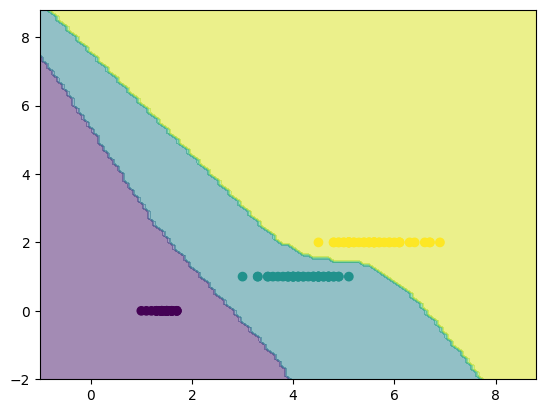

In [212]:
## ploting

import matplotlib.pyplot as plt
plt.contourf(XX,YY,votes.reshape(XX.shape),alpha=0.5)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [201]:
a=np.array([1,2,6,3])
b=np.array([7,8,9])

xx,yy=np.meshgrid(a,b)
xx

array([[1, 2, 6, 3],
       [1, 2, 6, 3],
       [1, 2, 6, 3]])

In [202]:
np.array([xx.ravel(),yy.ravel()]).T

array([[1, 7],
       [2, 7],
       [6, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [6, 8],
       [3, 8],
       [1, 9],
       [2, 9],
       [6, 9],
       [3, 9]])